In [2]:
# Algoritmes de clustering.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))
print ("Correlacio:\n" + str(df.corr()))

############################################### Trantament de les dades ##############################################


# Treiem del conjunt de dades vols que han estat cancel·lats i derivats
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, variables que no anem a utilitzar
        #'Month', 'DayofMonth', 'DayOfWeek', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
        
df3 = df2.drop(['Dest','Origin','UniqueCarrier','Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted', 'SecurityDelay', 'LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Terme quadràtic de la variable TaxiOut  i creem noves variables que ens poden ser d'interès
df3['TaxiOut2'] = df3['TaxiOut']**2 

# La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)
#df3['CarrierWN'] = (df3['UniqueCarrier'] == 'WN').astype(int)

# Creem dummy que ens indiqui el dia de la setmana
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'Dll',2:'Dm',3:'Dx',4:'Dj',5:'Dv',6:'Ds',7:'Dg'})

############################ Característiques de les dades carregades del dataframe optimitzat ##########################

# La variable ArrDelay que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents.
X, y = df_ok.loc[:, df_ok.columns != 'ArrDelay'], df_ok.loc[:,'ArrDelay']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

shape:
(1928371, 30)
shape:
(1928371, 12)
Head:
   Unnamed: 0  Month  DayofMonth  DayOfWeek  ActualElapsedTime  \
0           0      1           3          4              128.0   
1           1      1           3          4              128.0   
2           2      1           3          4               96.0   
3           4      1           3          4               90.0   
4           5      1           3          4              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  Distance  TaxiIn  TaxiOut  \
0           150.0    116.0     -14.0       8.0       810     4.0      8.0   
1           145.0    113.0       2.0      19.0       810     5.0     10.0   
2            90.0     76.0      14.0       8.0       515     3.0     17.0   
3            90.0     77.0      34.0      34.0       515     3.0     10.0   
4           115.0     87.0      11.0      25.0       688     4.0     10.0   

   TaxiOut2  Dll  Dm  Dx  Dj  Dv  Ds  Dg  
0      64.0    0   0   0   1   0   0   0  
1     

In [8]:
# Exercici 1
# Classifica els diferents vols utilitzant l'algorisme de K-means.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

# Agrupacio en clústeres de K-means 
# Estandaritzar les dades y obtencio de dades pre filtrades dataframe
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Instancia a la clase KMeans
kmeans = KMeans(
   init="random",
   n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42
)

# Ejecucio de les dades
print("Ejecucio de les dades")
print(kmeans.fit(scaled_features))

# El valor SSE més baix
print("El valor SSE més baix")
print(kmeans.inertia_)

# Ubicacions finals del centroide
print("Ubicacions finals del centroide")
print(kmeans.cluster_centers_)

# El nombre d'iteracions necessàries per convergir
print("El nombre d'iteracions necessàries per convergir")
print(kmeans.n_iter_)

# Etiquetas predites
print (kmeans.labels_[:5])      

Ejecucio de les dades
KMeans(init='random', n_clusters=3, random_state=42)
El valor SSE més baix
28569448.471528724
Ubicacions finals del centroide
[[-1.85584277e-02 -1.07204218e-02  1.77374125e-02  7.36765882e-01
  -3.59766341e-01 -3.59736451e-01 -3.60399901e-01  5.94271622e-03
  -3.59426070e-01 -3.24789075e-02 -7.09302384e-02 -5.36117096e-02
  -4.20567741e-01 -3.94401453e-01 -3.96080015e-01  2.98779149e-01
   3.32065008e-01  2.48362130e-01  3.12291255e-01]
 [ 5.23447418e-02  1.54832027e-02 -8.70313699e-04  4.72901602e-02
   1.80602531e+00  1.81000174e+00  1.81794275e+00 -1.66009131e-02
   1.82540940e+00  1.79090843e-01  3.08246855e-01  2.47704849e-01
  -5.59612198e-02 -2.03712559e-02  4.94027416e-03  3.47114952e-02
  -1.96918610e-03  5.61504738e-02 -1.21534834e-02]
 [ 1.42779643e-03  7.48894925e-03 -2.35687012e-02 -1.01667102e+00
  -3.29732471e-01 -3.31568929e-01 -3.34259464e-01 -5.29807799e-04
  -3.38947576e-01 -3.70155910e-02 -4.34083000e-02 -3.94585435e-02
   5.93429531e-01  5.420

In [ ]:
# Exercici 2
# Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.
# Exercici 3
# Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}
  
# Lliste de clusters
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)
        
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("SSE vols")
plt.show()   

#from kneed import KneeLocator

#kl = KneeLocator(
#    range(1, 11), sse, curve="convex", direction="decreasing"
#)

#print(kl.elbow)


silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
    
    
features, true_labels = make_moons(
     n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)


 # Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)


# Coeficient de silueta
print("Coeficient de silueta")
print(kmeans_silhouette)

# Coeficient de dbscan
print("Coeficient de dbscan")
print(dbscan_silhouette)   


KeyError: 5

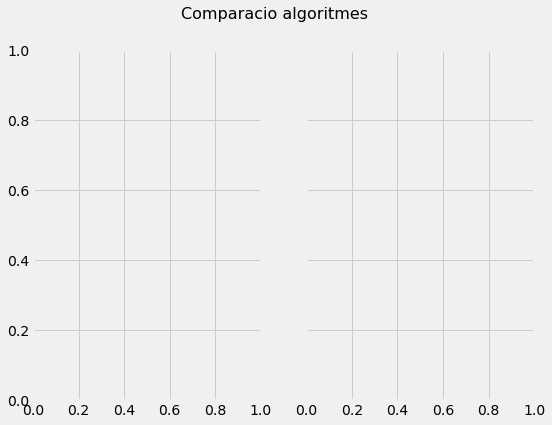

In [10]:
# Grafic traz de la comparación dels dos algoritmos
fig, (ax1, ax2) = plt.subplots(
      1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Comparacio algoritmes", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
     f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
     f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()